# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [27]:
# importing the data from csv file to dataframe and stored in diabetes variable 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
wholesale_df = pd.read_csv('/Users/inderpalsura/Desktop/Lighthouse/WholeSale_data-analysis/Wholesale_Data.csv')
wholesale_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [28]:
# information about the dataset
wholesale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [29]:
# to know more about the dataset
# As it shows the min value for channel is 1 and region is 1 and where as the max value is 2 for channel and 3 is for region.
# detegents paper is at lowest i.e 25% and fresh is at higest i.e 3127.75.
# in overall, fresh is the maxium usage in the summary.
wholesale_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
# to know about the dataset with transpose - T
wholesale_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [30]:
# Check for missing values
wholesale_df.isnull().head(10)
# In below output it shows there is no mising value.

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [31]:
# Check for missing values. As a result, there are no missing values.
wholesale_df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [12]:
# checking for duplicate value in the dataset. In result, there are no duplicate values as it shows false.
wholesale_df.duplicated().any()

False

In [13]:
# Handle missing values
# drop rows with missing values
wholesale_df.dropna(inplace=True)
wholesale_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


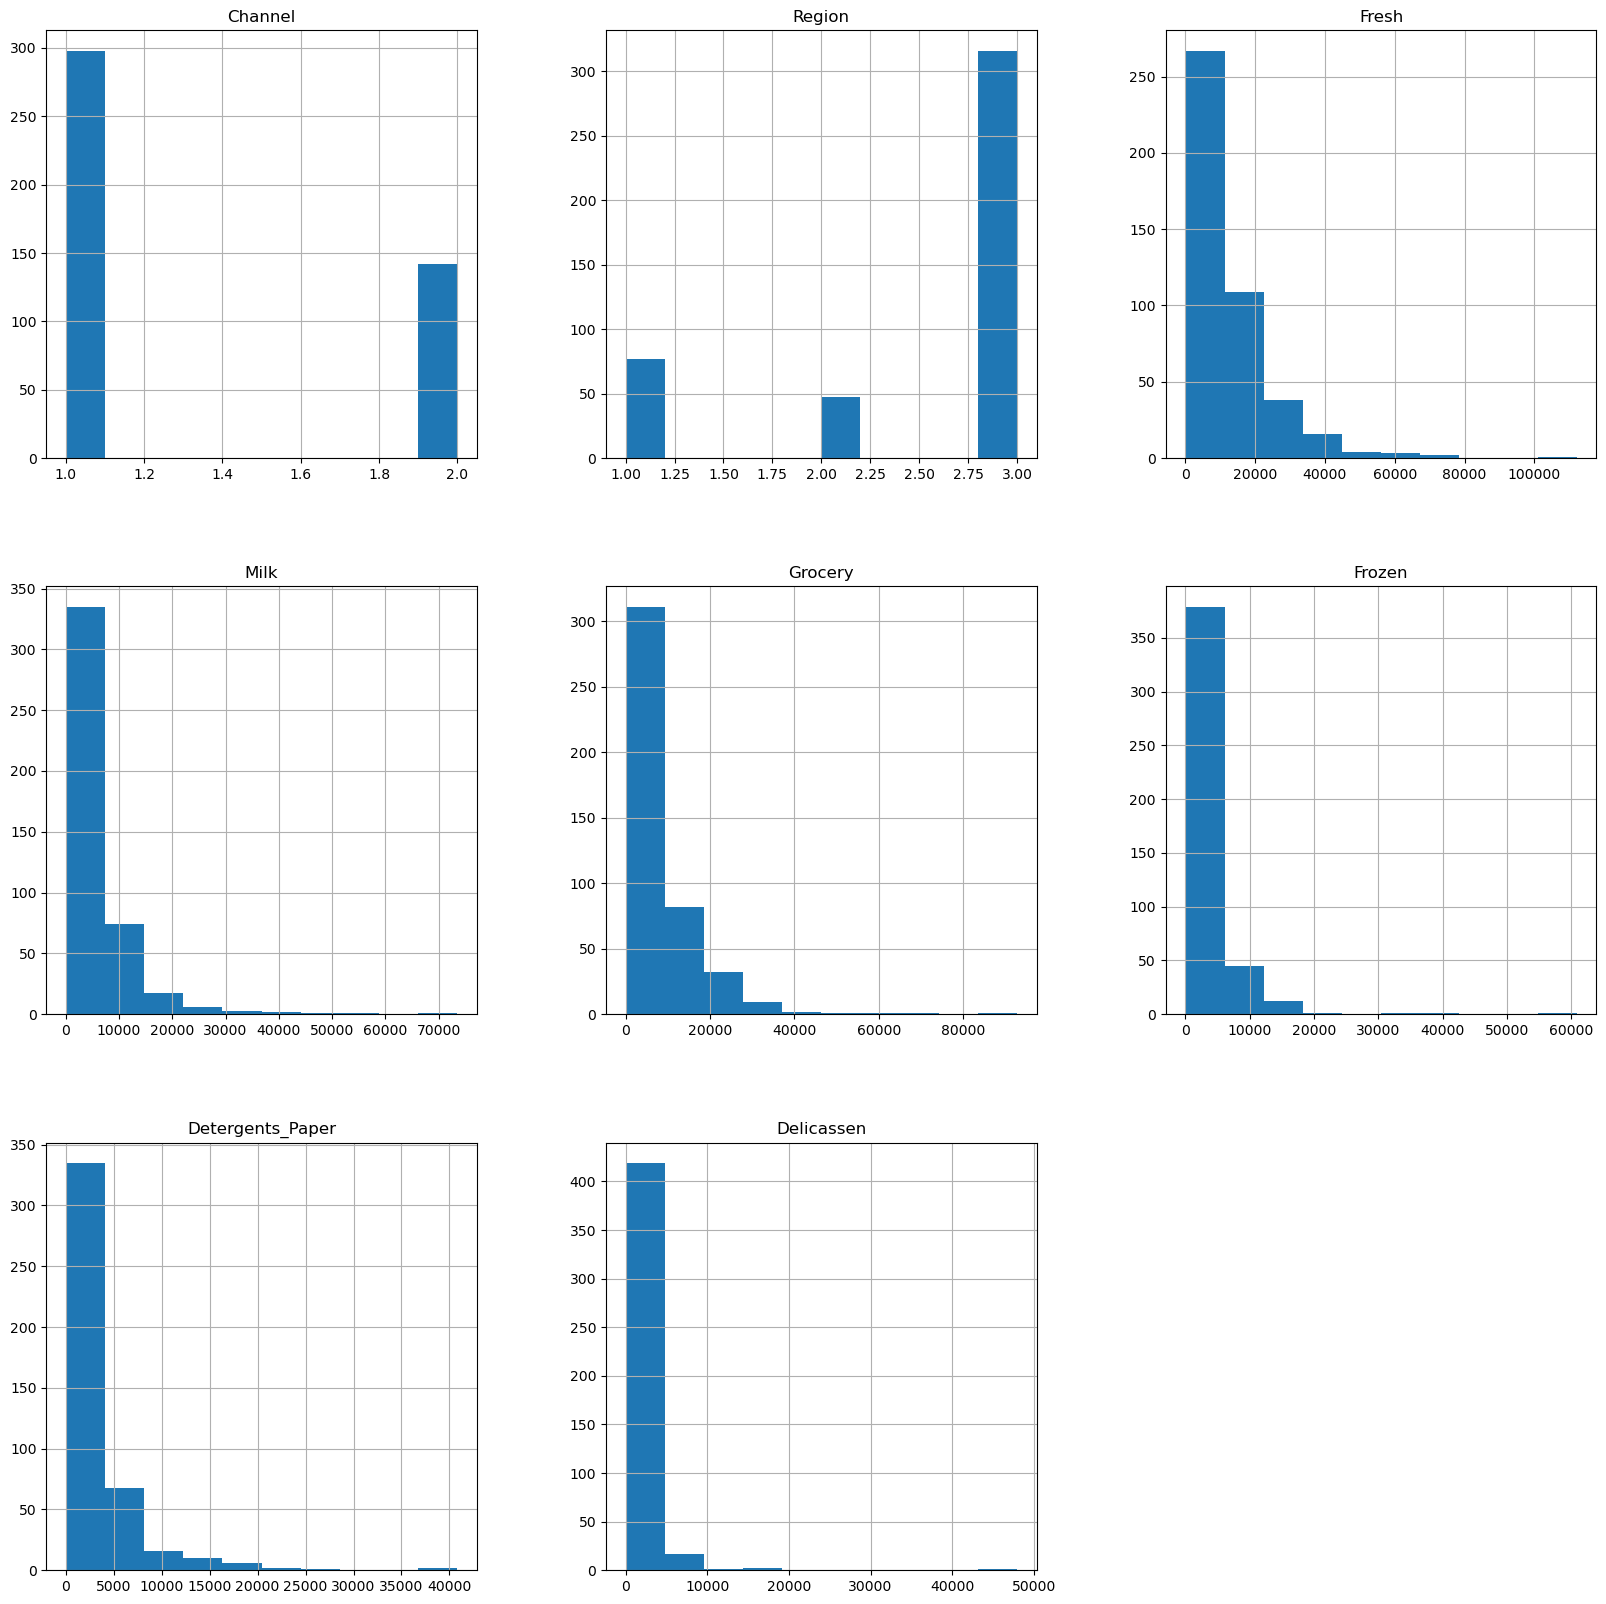

In [14]:
# showing the distribution of values within that specific column in histogram in order to understand the identify data patterns, potential issues, and decide on data preprocessing steps, such as handling outliers or normalizing features.
# in channel and region it show the count of different channel and regions. In channel, 1 has the higest count in comparision to 2. In region, there are three regions and 3 is the higest amongst all and 2 is the lowest.
# in other charts, it show the count of particular item is usage
p = wholesale_df.hist(figsize = (20,20))

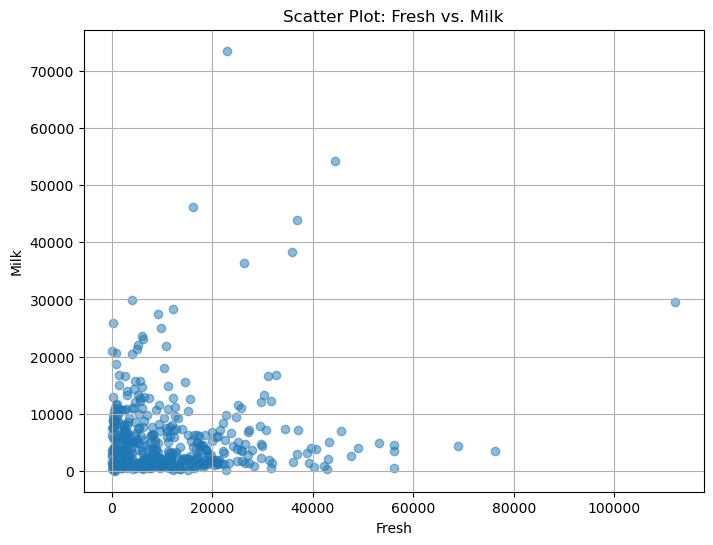

In [51]:
# Extract 'Fresh' and 'Milk' columns
fresh = wholesale_df['Fresh']
milk = wholesale_df['Milk']

plt.figure(figsize=(8, 6))
plt.scatter(fresh, milk, alpha=0.5)  # Alpha controls transparency
plt.title('Scatter Plot: Fresh vs. Milk')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.grid(True)
plt.show()

# Overall, there is a positive correlation between the fresh and milk, like there is a increase in fresh,  spending on milk products also tends to increase

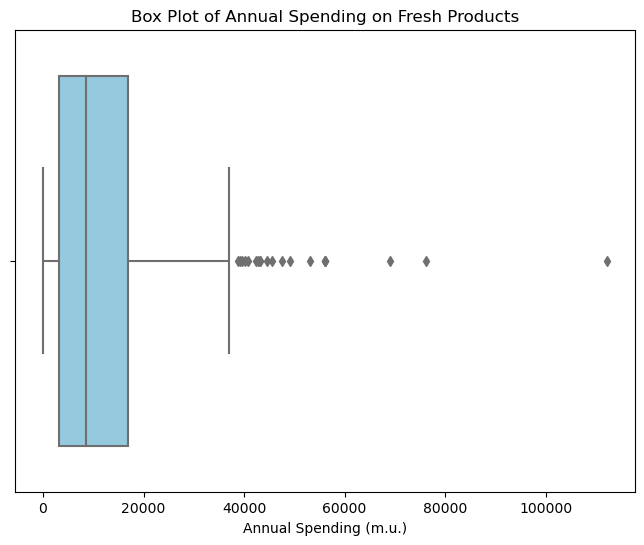

In [60]:
# Create a box plot for 'Fresh' spending
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fresh', data=wholesale_df, color='skyblue')
plt.title('Box Plot of Annual Spending on Fresh Products')
plt.xlabel('Annual Spending (m.u.)')
plt.show()

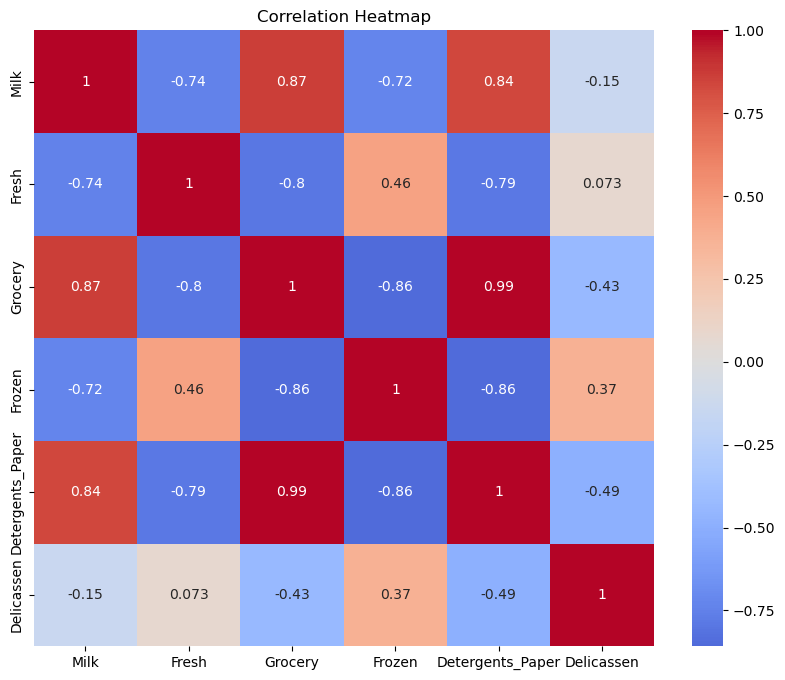

In [61]:
# Heatmap for correlation between variables
plt.figure(figsize=(10, 8))
correlation = wholesale_df[['Milk', 'Fresh', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].corr()
sns.heatmap(correlation.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()
# I have removed region and channel from the correlation in order get the perfect correlation of all and as the heatmap shows the majority it has negative correlation among all
# Grocery and Detergent Paper has positive correlation i.e 0.99
# Fresh and Dellicassen has neutral correlation i.e 0.073
# Detergent Paper and Dellicassen has a negative correlation i.e -0.49

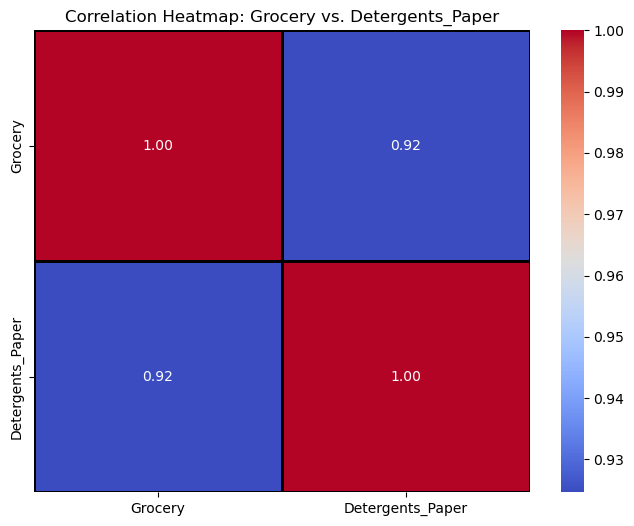

In [62]:
# Assuming wholesale_df is your DataFrame
correlation_matrix = wholesale_df.corr()

# Create a heatmap for the correlation between 'Grocery' and 'Detergents_Paper'
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['Grocery', 'Detergents_Paper']].loc[['Grocery', 'Detergents_Paper']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlation Heatmap: Grocery vs. Detergents_Paper')
plt.show()
#  a correlation coefficient of 0.92 signifies a very strong and positive linear relationship between the variables, indicating that they are highly correlated and tend to move together in a nearly perfect positive direction.

Correlation between 'Milk' and 'Fresh': 0.10050976829985858


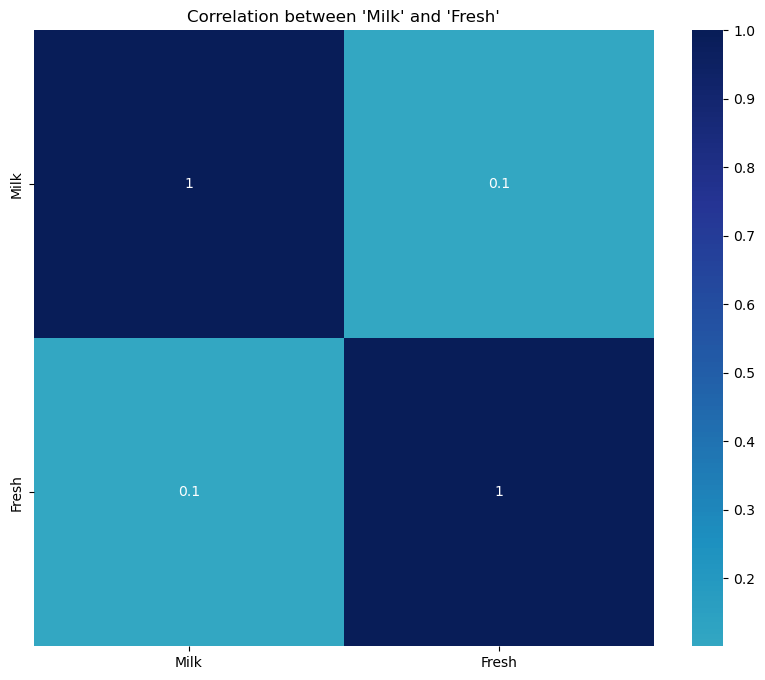

In [63]:
# Extract the correlation coefficient between 'Milk' and 'Fresh'
correlation_matr = wholesale_df[['Milk', 'Fresh']].corr()

correlation_milk_fresh = correlation_matrix.loc['Milk', 'Fresh']

print(f"Correlation between 'Milk' and 'Fresh': {correlation_milk_fresh}")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matr, annot=True, cmap='YlGnBu', center=0)
plt.title("Correlation between 'Milk' and 'Fresh'")
plt.show()
# In this case, correlation coefficient is close to zero indicates that there is no strong linear relationship between the two variables. In this case, the correlation is very close to zero, indicating that changes in 'Milk' spending are not strongly indicative of changes in 'Fresh' spending or vice versa. Therefore, we can conclude that 'Milk' and 'Fresh' spending are relatively independent of each other."

# Remarks on the above analysis:
From the provided descriptive statistics, here are some observations:

No Missing Values: There are 440 entries in each column, and no missing values in the data, which is good.

No Duplicates: The data doesn't have any duplicate rows.

Channels and Regions: These seem to be categorical variables, with 'Channel' having two categories (1 and 2) and 'Region' three categories (1, 2, 3).

Different Scales: The means and standard deviations for each feature vary significantly, indicating that the data spans several orders of magnitude. This could potentially impact certain machine learning models that are sensitive to the scale of the input features ). You might need to consider feature scaling.

Outliers: Looking at the difference between the 75% percentile (Q3) and the maximum values of each feature, we see significant jumps. For instance, in the 'Fresh' feature, the 75% percentile is at 16933.75, but the maximum value is 112151. This suggests the presence of outliers that could potentially skew your model.

Right Skewness: Features such as 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', and 'Delicassen' show a right skew (mean > median). This could impact the performance of some machine learning algorithms.

Feature Correlation: It's also essential to examine the correlation matrix (not provided in your output but could be generated during EDA). Correlation between features can inform us about potential multi-collinearity, and correlation of features with the target variable can provide an indication of important features.

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [64]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [75]:
#columns are isolated for further analysis, such as clustering or dimensionality reduction using techniques like PCA.
selected_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = wholesale_df[selected_features]
print(X)

     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0    12669   9656     7561     214              2674        1338
1     7057   9810     9568    1762              3293        1776
2     6353   8808     7684    2405              3516        7844
3    13265   1196     4221    6404               507        1788
4    22615   5410     7198    3915              1777        5185
..     ...    ...      ...     ...               ...         ...
435  29703  12051    16027   13135               182        2204
436  39228   1431      764    4510                93        2346
437  14531  15488    30243     437             14841        1867
438  10290   1981     2232    1038               168        2125
439   2787   1698     2510      65               477          52

[440 rows x 6 columns]


In [84]:
#in this step standardization is an important preprocessing step because it ensures that each feature contributes equally to the analysis, especially when features are measured in different units or have different scales.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.05293319  0.52356777 -0.04111489 -0.58936716 -0.04356873 -0.06633906]
 [-0.39130197  0.54445767  0.17031835 -0.27013618  0.08640684  0.08915105]
 [-0.44702926  0.40853771 -0.0281571  -0.13753572  0.13323164  2.24329255]
 ...
 [ 0.20032554  1.31467078  2.34838631 -0.54337975  2.51121768  0.12145607]
 [-0.13538389 -0.51753572 -0.60251388 -0.41944059 -0.56977032  0.21304614]
 [-0.72930698 -0.5559243  -0.57322717 -0.62009417 -0.50488752 -0.52286938]]


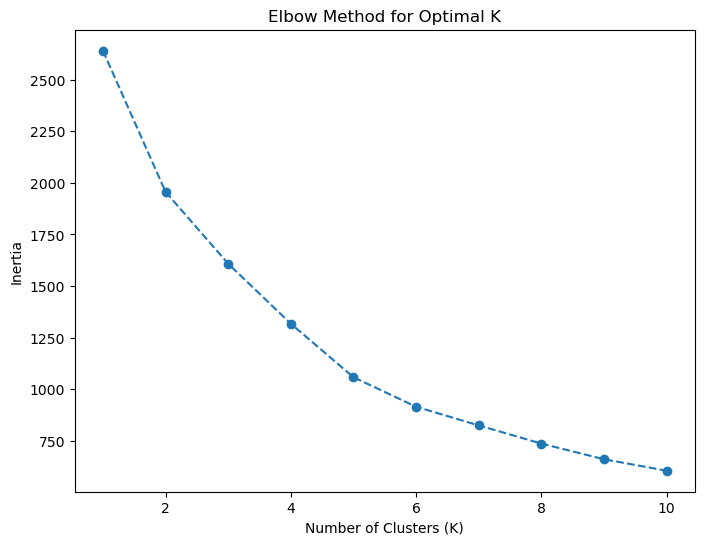

In [73]:
# Determine the optimal number of clusters (K)
# Use the Elbow Method to find the best K value
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()
# As per the Elbow method grapth is a smooth flow and the best suitable optimal value of k is 4.

In [74]:
# Initialize K-means clustering with the chosen K
chosen_k = 4 
kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init= 10)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [102]:
# Initialize K-means clustering with the chosen K and checking the values of the cluster.
chosen_k = 4
kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init= 10)
kmeans.fit_predict(X_scaled)

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 3, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0, 1, 2,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 3,
       1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 3, 0, 3, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [103]:

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to your dataset
wholesale_df['Cluster'] = cluster_labels

# Visualize the clusters using Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

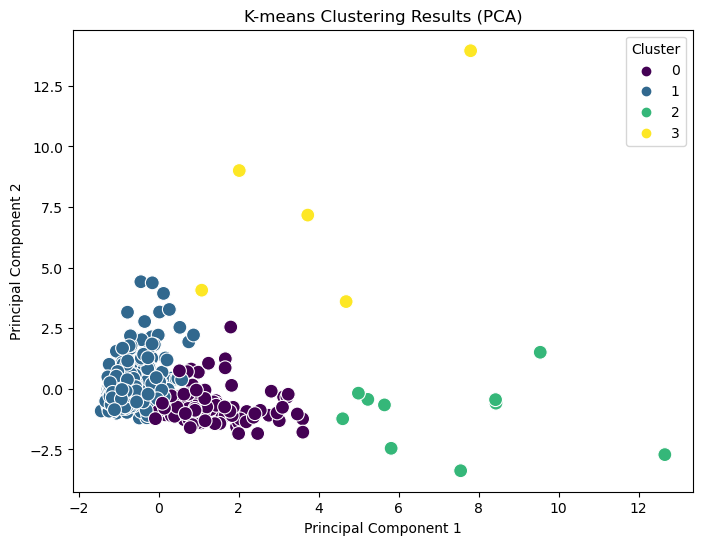

In [104]:
# Create a scatter plot of the clusters in the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', s=100)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Results (PCA)')
plt.legend(title='Cluster')
plt.show()

In [105]:
# Analyze and interpret the clusters by checking the means in order to review which category id popular in which cluster.
cluster_summary = wholesale_df.groupby('Cluster')[selected_features].mean()
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
                Fresh          Milk       Grocery        Frozen  \
Cluster                                                           
0         5591.436364  10113.027273  15637.390909   1499.918182   
1        13504.987302   3044.539683   3844.444444   3271.425397   
2        15964.900000  34708.500000  48536.900000   3054.600000   
3        50270.600000  26361.800000  16416.000000  25122.800000   

         Detergents_Paper    Delicassen  
Cluster                                  
0             6711.354545   1759.090909  
1              852.320635   1127.107937  
2            24875.200000   2942.800000  
3             2475.000000  18595.200000  


# Remarks:-
As per the mean calculation of all clusters:
    - Grocercy is popular in cluster 0 and 2.
    - Fresh is preffered by the cluster 1 and 3.

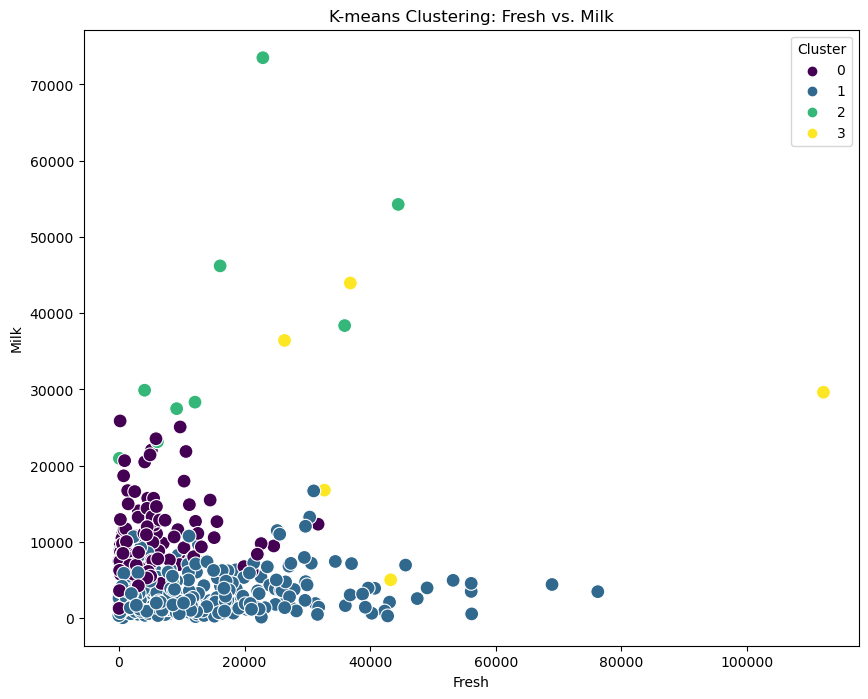

In [106]:
# You can further analyze and interpret the clusters based on their attribute means

# Optionally, you can visualize the original data points in the clusters
# For example, visualize the 'Fresh' vs. 'Milk' for each cluster
# As the graph shows, there is a positive relation betwen the both items, like if fresh is increasing then steadly milk consumption is also increasing.
plt.figure(figsize=(10, 8))
sns.scatterplot(data=wholesale_df, x='Fresh', y='Milk', hue='Cluster', palette='viridis', s=100)
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('K-means Clustering: Fresh vs. Milk')
plt.legend(title='Cluster')
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [108]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [111]:
# taking the previous scaled transform array value.
print(X_scaled)

[[ 0.05293319  0.52356777 -0.04111489 ... -0.06633906  0.38910393
   0.38910393]
 [-0.39130197  0.54445767  0.17031835 ...  0.08915105 -1.51318195
  -1.51318195]
 [-0.44702926  0.40853771 -0.0281571  ...  2.24329255 -1.51318195
  -1.51318195]
 ...
 [ 0.20032554  1.31467078  2.34838631 ...  0.12145607 -1.51318195
  -1.51318195]
 [-0.13538389 -0.51753572 -0.60251388 ...  0.21304614  0.38910393
   0.38910393]
 [-0.72930698 -0.5559243  -0.57322717 ... -0.52286938  0.38910393
   0.38910393]]


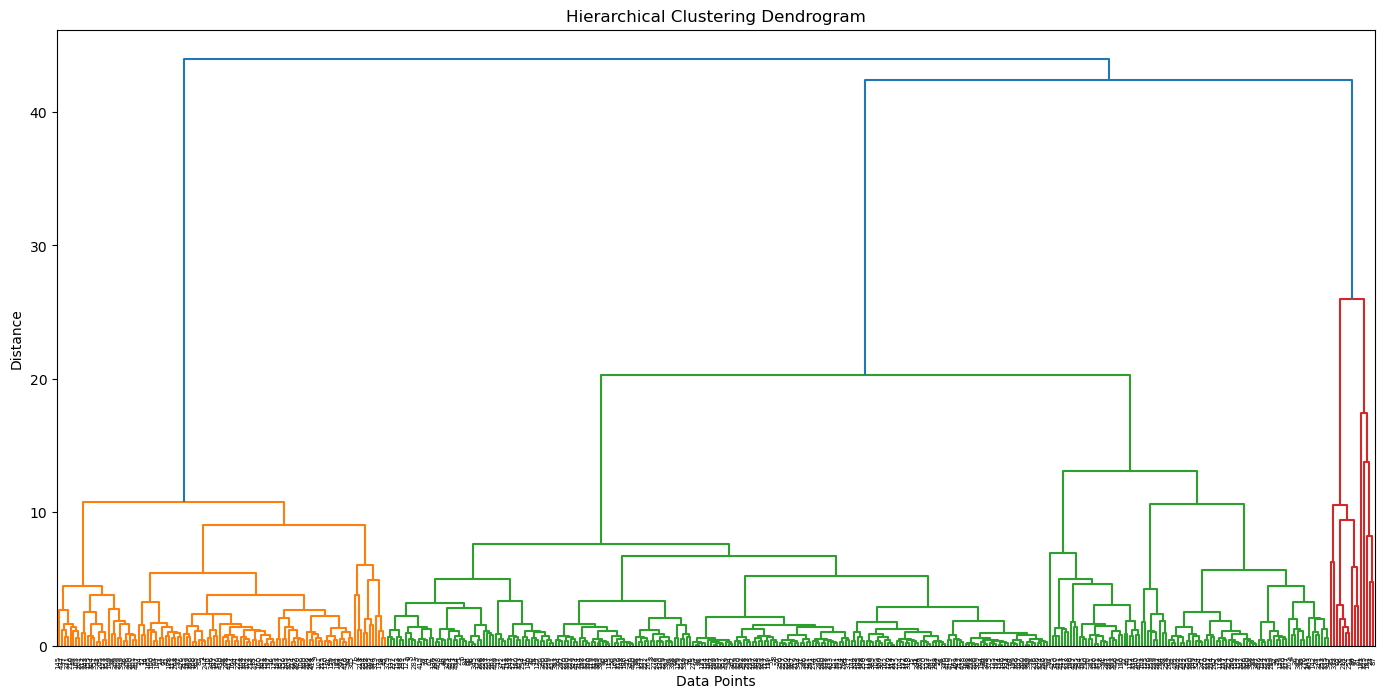

In [109]:
# Perform hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward', metric='euclidean')

# Plot the dendrogram to determine the optimal number of clusters
plt.figure(figsize=(17, 8))
dendrogram(linkage_matrix, p=30, truncate_mode='level', orientation='top', labels=wholesale_df.index)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [115]:
# Analyze the dendrogram to determine the optimal number of clusters
# Look for the largest vertical line that can be drawn without crossing any horizontal lines
# This line represents a reasonable number of clusters to choose (e.g., based on the "elbow" of the dendrogram)

# Based on the dendrogram analysis, choose an appropriate number of clusters
# You can visually estimate the number of clusters based on the dendrogram or use other techniques

# Perform hierarchical clustering again with the chosen number of clusters
chosen_num_clusters = 3

agg_cluster = AgglomerativeClustering(n_clusters=chosen_num_clusters, linkage='ward')
agg_cluster.fit(X_scaled)


AgglomerativeClustering(n_clusters=3)

Cluster Summary:
                Fresh          Milk       Grocery        Frozen  \
Cluster                                                           
0        27400.133333  31926.266667  37829.933333  10410.666667   
1         5591.436364  10113.027273  15637.390909   1499.918182   
2        13504.987302   3044.539683   3844.444444   3271.425397   

         Detergents_Paper   Delicassen  
Cluster                                 
0            17408.466667  8160.266667  
1             6711.354545  1759.090909  
2              852.320635  1127.107937  


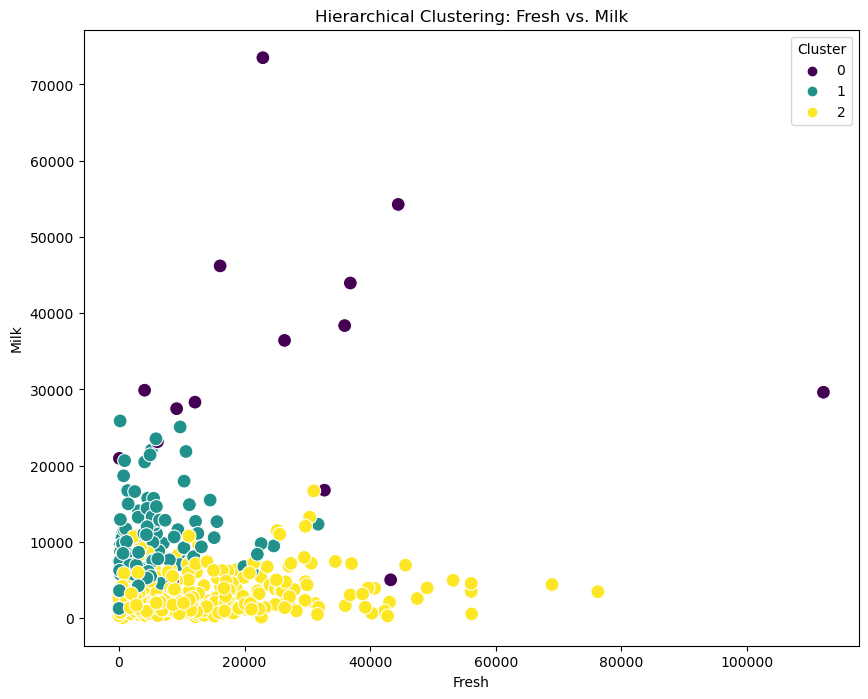

In [116]:
# Add the cluster labels to your dataset
wholesale_df['Cluster'] = agg_cluster.labels_

# Analyze and interpret the clusters
cluster_summary = wholesale_df.groupby('Cluster')[selected_features].mean()
print("Cluster Summary:")
print(cluster_summary)

# Optionally, you can visualize the original data points in the clusters
# For example, visualize the 'Fresh' vs. 'Milk' for each cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(data=wholesale_df, x='Fresh', y='Milk', hue='Cluster', palette='viridis', s=100)
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Hierarchical Clustering: Fresh vs. Milk')
plt.legend(title='Cluster')
plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

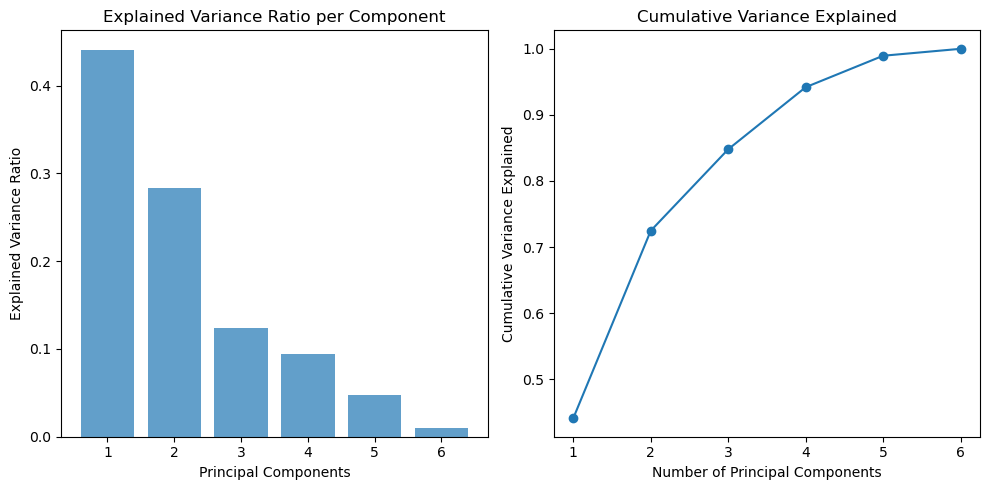

number of components retained: 5
Loadings (Component Weights):
                       PC1       PC2       PC3       PC4       PC5
Fresh             0.069823  0.689646 -0.699555 -0.177910 -0.026050
Milk              0.887556  0.108643  0.052009 -0.065538  0.442299
Grocery           0.943139 -0.190837 -0.093346  0.079668 -0.168555
Frozen            0.083345  0.798522  0.153635  0.577799 -0.014946
Detergents_Paper  0.893290 -0.333415 -0.117295  0.129096 -0.181740
Delicassen        0.404901  0.658654  0.451212 -0.414973 -0.168395

Feature Importance:
                       PC1       PC2       PC3       PC4       PC5
Fresh             0.042884  0.527932 -0.812257 -0.236686 -0.048683
Milk              0.545118  0.083168  0.060388 -0.087190  0.826579
Grocery           0.579256 -0.146088 -0.108384  0.105987 -0.314999
Frozen            0.051189  0.611278  0.178386  0.768683 -0.027932
Detergents_Paper  0.548640 -0.255233 -0.136192  0.171744 -0.339640
Delicassen        0.248682  0.504207  0.52390

In [135]:
# Part 4 Performing Principal Component Analysis

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Selecting relevant columns for PCA
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = wholesale_df[features]

# Standardize the feature matrix
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
pca.fit(X_std)

# Explained Variance Ratio
explained_var_ratio = pca.explained_variance_ratio_

# Cumulative Variance ratio
cumulative_var_ratio = explained_var_ratio.cumsum()

# Scree Plot for Explained Variance Ratio
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_var_ratio) + 1), explained_var_ratio, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Component')

# Scree Plot for Cumulative Variance Explained
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained')

plt.tight_layout()
plt.show()

# Determine the number of principal components needed to retain at least 95% of the total variance in the dataset. 
n_components = (cumulative_var_ratio <= 0.95).sum() + 1
print ("number of components retained:", n_components)

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

# to understand the underlying structure of data
# Interpretation of components (loadings)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i}' for i in range(1, n_components+1)], index=features)

# Display the loadings
print("Loadings (Component Weights):")
print(loadings_df)

# Interpretation of components (feature importance)
feature_importance = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, n_components+1)], index=features)

# Display the feature importance
print("\nFeature Importance:")
print(feature_importance)

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

Through K-means clustering and hierarchical clustering, we identified distinct customer segments within the dataset. These segments represent groups of customers with similar purchasing behaviors based on attributes like fresh, milk, grocery, frozen, detergents_paper, and delicatessen.
Optimal Number of Clusters:

The Elbow Method and dendrogram analysis were used to determine the optimal number of clusters. For both K-means and hierarchical clustering, an appropriate number of clusters (e.g., 4) was selected to represent the data effectively.

Principal Component Analysis (PCA):
Principal component analysis was done to understand underlying structure of data and reduce dimensions. It was found that 5 principal components could explain 95% of variance of dataset. Therefore, we can drop the sixth principal component and proceed with dimensionally reduced dataset for further analysis.